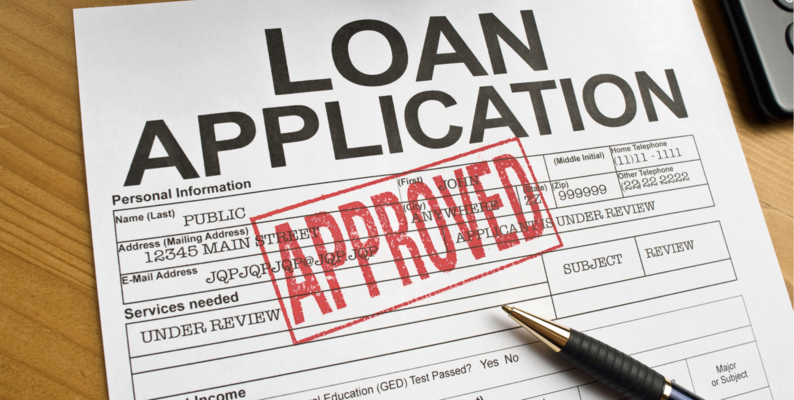

# About Dataset

**🏦 Synthetic Loan Approval Dataset**

**A Realistic, High-Quality Dataset for Credit Risk Modelling**

**🎯 Why This Dataset?**

**Most loan datasets on Kaggle have unrealistic patterns where:**

    1. ❌ Credit scores don't matter
    2. ❌ Approval logic is backwards
    3. ❌ Models learn nonsense patterns

`Unlike most loan datasets available online, this one is built on real banking criteria from US and Canadian financial institutions. Drawing from 3 years of hands-on finance industry experience, the dataset incorporates realistic correlations and business logic that reflect how actual lending decisions are made. This makes it perfect for data scientists looking to build portfolio projects that showcase not just coding ability, but genuine understanding of credit risk modelling.`    

## 🔑 Key Features

`Identifier:`

-Customer ID (unique identifier for each application)

`Demographics:`

-Age, Occupation Status, Years Employed

`Financial Profile:`

-Annual Income, Credit Score, Credit History Length -Savings/Assets, Current Debt

`Credit Behaviour:`

-Defaults on File, Delinquencies, Derogatory Marks

`Loan Request:`

-Product Type, Loan Intent, Loan Amount, Interest Rate

`Calculated Ratios:`

-Debt-to-Income, Loan-to-Income, Payment-to-Income

💡 What Makes This Dataset Special?

### 1️⃣ Real-World Approval Logic The dataset implements actual banking criteria:

`DTI ratio > 50% = automatic rejection`

`Defaults on file = instant reject`

`Credit score bands match real lending thresholds`

`Employment verification for loans ≥$20K`

### 2️⃣ Realistic Correlations

`Higher income → Better credit scores`

`Older applicants → Longer credit history`

`Students → Lower income, special treatment for small loans`

`Loan intent affects approval (Education best, Debt Consolidation worst)`

### 3️⃣ Product-Specific Rules

`Credit Cards: More lenient, higher limits`

`Personal Loans: Standard criteria, up to $100K`

`Line of Credit: Capped at $50K, manual review for high amounts`

### 4️⃣ Edge Cases Included

Young applicants (age 18) building first credit

Students with thin credit files

Self-employed with variable income

High debt-to-income ratios

Multiple delinquencies
🎓 Perfect For

Machine Learning Practice: Binary classification with real patterns

Credit Risk Modelling: Learn actual lending criteria

Portfolio Projects: Build impressive, explainable models

Feature Engineering: Rich dataset with meaningful relationships

Business Analytics: Understand financial decision-making

📈 Quick Stats

#### Approval Rates by Product

    - Credit Card: 60.4% more lenient)
    
    - Personal Loan: 46.9 (standard)
    
    - Line of Credit: 52.6% (moderate)
    
    - Loan Intent (Best → Worst Approval Odds)

    - Education (63% approved)

    - Personal (58% approved)
    
    - Medical/Home (52% approved)

    - Business (48% approved)

    - Debt Consolidation (40% approved)

    - Credit Score Distribution

## 🎯 Expected Model Performance

`With proper feature engineering and tuning:`

**Accuracy: 75-85%**

**ROC-AUC: 0.80-0.90**

**F1-Score: 0.75-0.85**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px
import warnings
import os

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [3]:
df = pd.read_csv("../data/raw/Loan_approval_data_2025.csv")   

In [4]:
df.dtypes

customer_id                 object
age                          int64
occupation_status           object
years_employed             float64
annual_income                int64
credit_score                 int64
credit_history_years       float64
savings_assets               int64
current_debt                 int64
defaults_on_file             int64
delinquencies_last_2yrs      int64
derogatory_marks             int64
product_type                object
loan_intent                 object
loan_amount                  int64
interest_rate              float64
debt_to_income_ratio       float64
loan_to_income_ratio       float64
payment_to_income_ratio    float64
loan_status                  int64
dtype: object

In [5]:
df.head()

customer_id  age occupation_status  years_employed  annual_income  \
0  CUST100000   40          Employed            17.2          25579   
1  CUST100001   33          Employed             7.3          43087   
2  CUST100002   42           Student             1.1          20840   
3  CUST100003   53           Student             0.5          29147   
4  CUST100004   32          Employed            12.5          63657   

   credit_score  credit_history_years  savings_assets  current_debt  \
0           692                   5.3             895         10820   
1           627                   3.5             169         16550   
2           689                   8.4              17          7852   
3           692                   9.8            1480         11603   
4           630                   7.2             209         12424   

   defaults_on_file  delinquencies_last_2yrs  derogatory_marks   product_type  \
0                 0                        0                 0    Credit Card   
1                 0                        1                 0  Personal Loan   
2                 0                        0                 0    Credit Card   
3                 0                        1                 0    Credit Card   
4                 0                        0                 0  Personal Loan   

          loan_intent  loan_amount  interest_rate  debt_to_income_ratio  \
0            Business          600          17.02                 0.423   
1    Home Improvement        53300          14.10                 0.384   
2  Debt Consolidation         2100          18.33                 0.377   
3            Business         2900          18.74                 0.398   
4           Education        99600          13.92                 0.195   

   loan_to_income_ratio  payment_to_income_ratio  loan_status  
0                 0.023                    0.008            1  
1                 1.237                    0.412            0  
2                 0.101                    0.034            1  
3                 0.099                    0.033            1  
4                 1.565                    0.522            1

In [6]:
df.shape

(50000, 20)

In [7]:
df['occupation_status'].unique()

array(['Employed', 'Student', 'Self-Employed'], dtype=object)

In [8]:
df['product_type'].unique()

array(['Credit Card', 'Personal Loan', 'Line of Credit'], dtype=object)

In [9]:
df['loan_intent'].unique()

array(['Business', 'Home Improvement', 'Debt Consolidation', 'Education',
       'Personal', 'Medical'], dtype=object)

In [10]:
# Display summary statistics for a dataframe
df.describe()

age  years_employed  annual_income  credit_score  \
count  50000.000000    50000.000000   50000.000000  50000.000000   
mean      34.957060        7.454868   50062.892040    643.614820   
std       11.118603        7.612097   32630.501014     64.731518   
min       18.000000        0.000000   15000.000000    348.000000   
25%       26.000000        1.300000   27280.500000    600.000000   
50%       35.000000        4.900000   41607.500000    643.000000   
75%       43.000000       11.400000   62723.250000    687.000000   
max       70.000000       39.900000  250000.000000    850.000000   

       credit_history_years  savings_assets   current_debt  defaults_on_file  \
count          50000.000000    50000.000000   50000.000000      50000.000000   
mean               8.168274     3595.619400   14290.442220          0.053480   
std                7.207552    13232.399398   13243.757493          0.224991   
min                0.000000        0.000000      60.000000          0.000000   
25%                2.000000      130.000000    5581.000000          0.000000   
50%                6.100000      568.000000   10385.000000          0.000000   
75%               12.600000     2271.000000   18449.250000          0.000000   
max               30.000000   300000.000000  163344.000000          1.000000   

       delinquencies_last_2yrs  derogatory_marks    loan_amount  \
count              50000.00000      50000.000000   50000.000000   
mean                   0.55464          0.147640   33041.874000   
std                    0.84505          0.412996   26116.185102   
min                    0.00000          0.000000     500.000000   
25%                    0.00000          0.000000   12300.000000   
50%                    0.00000          0.000000   26100.000000   
75%                    1.00000          0.000000   48500.000000   
max                    9.00000          4.000000  100000.000000   

       interest_rate  debt_to_income_ratio  loan_to_income_ratio  \
count   50000.000000          50000.000000          50000.000000   
mean       15.498591              0.285724              0.701999   
std         4.067942              0.159787              0.465788   
min         6.000000              0.002000              0.008000   
25%        12.180000              0.161000              0.333000   
50%        15.440000              0.265000              0.622000   
75%        18.870000              0.389000              1.010250   
max        23.000000              0.800000              2.001000   

       payment_to_income_ratio   loan_status  
count             50000.000000  50000.000000  
mean                  0.233995      0.550460  
std                   0.155268      0.497452  
min                   0.003000      0.000000  
25%                   0.111000      0.000000  
50%                   0.207000      1.000000  
75%                   0.337000      1.000000  
max                   0.667000      1.000000

In [11]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

In [12]:
# define numerical & categorical columns
#Let's drop the ID column

columns = [column for column in df.columns if column != "customer_id"]

numeric_features = [feature for feature in columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 16 numerical features : ['age', 'years_employed', 'annual_income', 'credit_score', 'credit_history_years', 'savings_assets', 'current_debt', 'defaults_on_file', 'delinquencies_last_2yrs', 'derogatory_marks', 'loan_amount', 'interest_rate', 'debt_to_income_ratio', 'loan_to_income_ratio', 'payment_to_income_ratio', 'loan_status']

We have 3 categorical features : ['occupation_status', 'product_type', 'loan_intent']


In [13]:
df.columns

Index(['customer_id', 'age', 'occupation_status', 'years_employed',
       'annual_income', 'credit_score', 'credit_history_years',
       'savings_assets', 'current_debt', 'defaults_on_file',
       'delinquencies_last_2yrs', 'derogatory_marks', 'product_type',
       'loan_intent', 'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio', 'loan_status'],
      dtype='object')

In [14]:
df[categorical_features[0]].value_counts().count()

np.int64(3)

In [15]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

occupation_status
Employed         69.942
Self-Employed    20.358
Student           9.700
Name: proportion, dtype: float64
---------------------------
product_type
Credit Card       44.910
Personal Loan     35.046
Line of Credit    20.044
Name: proportion, dtype: float64
---------------------------
loan_intent
Personal              24.858
Education             20.268
Medical               15.196
Business              14.938
Home Improvement      14.906
Debt Consolidation     9.834
Name: proportion, dtype: float64
---------------------------


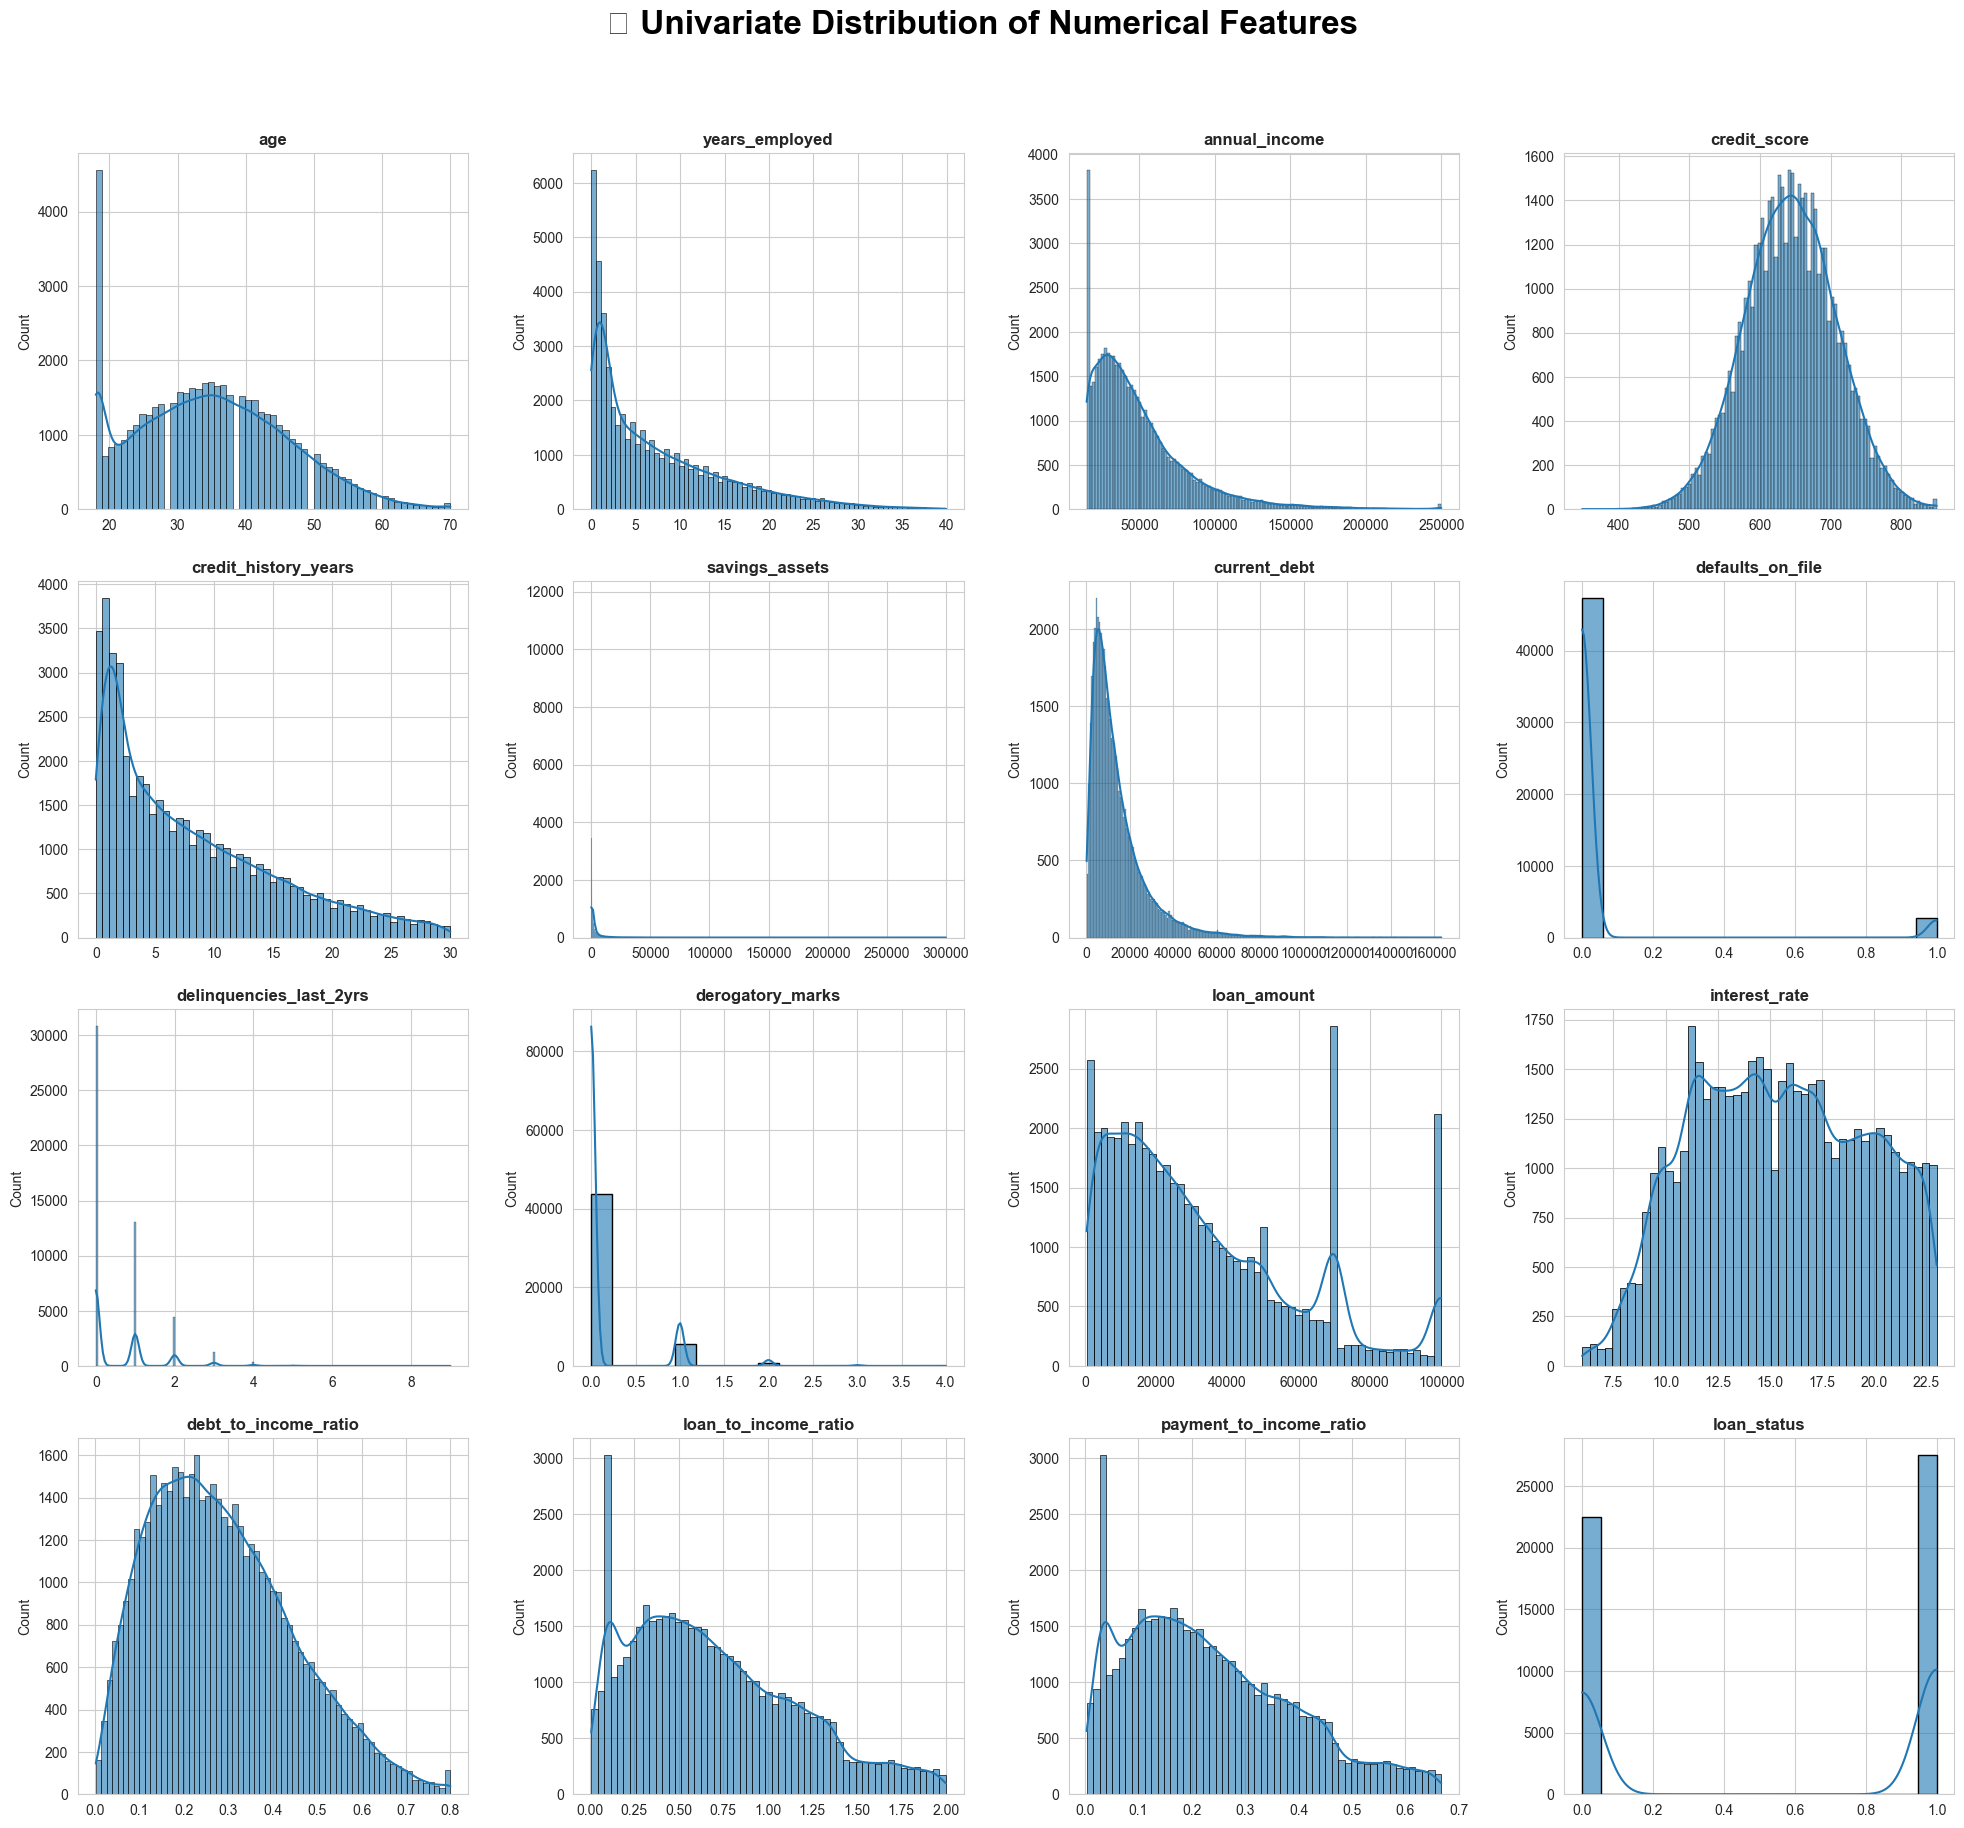

Plot saved at: plots/univariate_numeric_kde.png


In [16]:
# Create directory for saving plots
os.makedirs("plots", exist_ok=True)

plt.figure(figsize=(20, 18))
plt.suptitle(
    '📊 Univariate Distribution of Numerical Features',
    fontsize=24, fontweight='bold', y=1.02
)

sns.set_style("whitegrid")

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    
    # KDE + Histogram for richer visualization
    sns.histplot(
        df[feature], kde=True, 
        edgecolor="black",
        alpha=0.6
    )
    
    plt.title(feature, fontsize=12, fontweight='bold')
    plt.xlabel("")
    plt.tight_layout(pad=2.0)

# Save high-resolution version
save_path = "plots/univariate_numeric_kde.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

print(f"Plot saved at: {save_path}")

In [17]:
def analyze_numerical_features(df, numeric_features):
    insights = {}

    for col in numeric_features:
        series = df[col].dropna()

        desc = series.describe()
        skew = series.skew()
        kurt = series.kurt()

        insights[col] = {
            "mean": round(desc["mean"], 2),
            "median": round(series.median(), 2),
            "std_dev": round(desc["std"], 2),
            "min": desc["min"],
            "max": desc["max"],
            "skewness": round(skew, 2),
            "kurtosis": round(kurt, 2)
        }

    # Display Insights Table
    insights_df = pd.DataFrame(insights).T
    display(insights_df)

    print("\n\n================ NUMERICAL FEATURE INSIGHTS ================\n")

    for col, stats in insights.items():
        print(f"📌 Feature: **{col}**")
        print(f"- Mean: {stats['mean']}")
        print(f"- Median: {stats['median']}")
        print(f"- Std Dev: {stats['std_dev']}")
        print(f"- Range: {stats['min']} → {stats['max']}")
        print(f"- Skewness: {stats['skewness']} ( {'Right-skewed' if stats['skewness']>0 else 'Left-skewed' } )")
        print(f"- Kurtosis: {stats['kurtosis']}")
        
        # Automatic insight rules
        if stats['skewness'] > 1:
            print("  → Strong right skew → Consider log/box-cox transform.")
        elif stats['skewness'] < -1:
            print("  → Strong left skew → Check distribution & outliers.")
        
        if stats['std_dev'] > stats['mean'] * 1.5:
            print("  → High variance → Scaling needed.")

        if stats['min'] == stats['max']:
            print("  → Constant feature → Remove")

        print("\n")

analyze_numerical_features(df, numeric_features)

mean    median   std_dev        min         max  \
age                         34.96     35.00     11.12     18.000      70.000   
years_employed               7.45      4.90      7.61      0.000      39.900   
annual_income            50062.89  41607.50  32630.50  15000.000  250000.000   
credit_score               643.61    643.00     64.73    348.000     850.000   
credit_history_years         8.17      6.10      7.21      0.000      30.000   
savings_assets            3595.62    568.00  13232.40      0.000  300000.000   
current_debt             14290.44  10385.00  13243.76     60.000  163344.000   
defaults_on_file             0.05      0.00      0.22      0.000       1.000   
delinquencies_last_2yrs      0.55      0.00      0.85      0.000       9.000   
derogatory_marks             0.15      0.00      0.41      0.000       4.000   
loan_amount              33041.87  26100.00  26116.19    500.000  100000.000   
interest_rate               15.50     15.44      4.07      6.000      23.000   
debt_to_income_ratio         0.29      0.26      0.16      0.002       0.800   
loan_to_income_ratio         0.70      0.62      0.47      0.008       2.001   
payment_to_income_ratio      0.23      0.21      0.16      0.003       0.667   
loan_status                  0.55      1.00      0.50      0.000       1.000   

                         skewness  kurtosis  
age                          0.34     -0.44  
years_employed               1.29      1.26  
annual_income                1.89      5.23  
credit_score                 0.01     -0.04  
credit_history_years         0.95      0.08  
savings_assets              12.05    203.39  
current_debt                 2.44      9.26  
defaults_on_file             3.97     13.76  
delinquencies_last_2yrs      1.82      4.09  
derogatory_marks             3.12     11.16  
loan_amount                  0.93      0.09  
interest_rate                0.02     -0.99  
debt_to_income_ratio         0.59     -0.15  
loan_to_income_ratio         0.66     -0.27  
payment_to_income_ratio      0.66     -0.27  
loan_status                 -0.20     -1.96



================ NUMERICAL FEATURE INSIGHTS ================

📌 Feature: **age**
- Mean: 34.96
- Median: 35.0
- Std Dev: 11.12
- Range: 18.0 → 70.0
- Skewness: 0.34 ( Right-skewed )
- Kurtosis: -0.44


📌 Feature: **years_employed**
- Mean: 7.45
- Median: 4.9
- Std Dev: 7.61
- Range: 0.0 → 39.9
- Skewness: 1.29 ( Right-skewed )
- Kurtosis: 1.26
  → Strong right skew → Consider log/box-cox transform.


📌 Feature: **annual_income**
- Mean: 50062.89
- Median: 41607.5
- Std Dev: 32630.5
- Range: 15000.0 → 250000.0
- Skewness: 1.89 ( Right-skewed )
- Kurtosis: 5.23
  → Strong right skew → Consider log/box-cox transform.


📌 Feature: **credit_score**
- Mean: 643.61
- Median: 643.0
- Std Dev: 64.73
- Range: 348.0 → 850.0
- Skewness: 0.01 ( Right-skewed )
- Kurtosis: -0.04


📌 Feature: **credit_history_years**
- Mean: 8.17
- Median: 6.1
- Std Dev: 7.21
- Range: 0.0 → 30.0
- Skewness: 0.95 ( Right-skewed )
- Kurtosis: 0.08


📌 Feature: **savings_assets**
- Mean: 3595.62
- Median: 568.0
- Std D

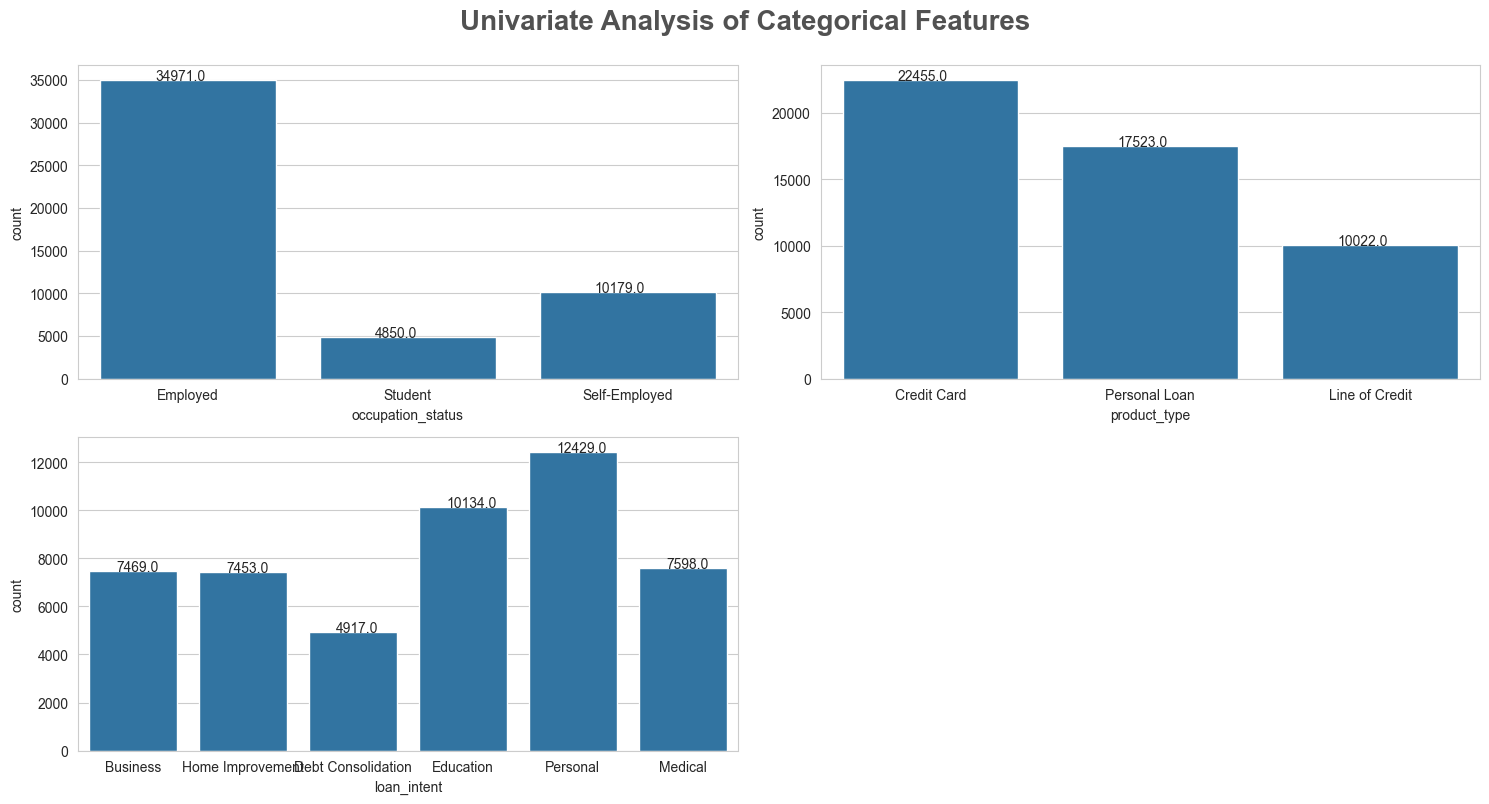

In [18]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(x=df[categorical_features[i]])
    if df[categorical_features[i]].value_counts().count() <10:
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
plt.savefig('./plots/Univariate_Cat.png')

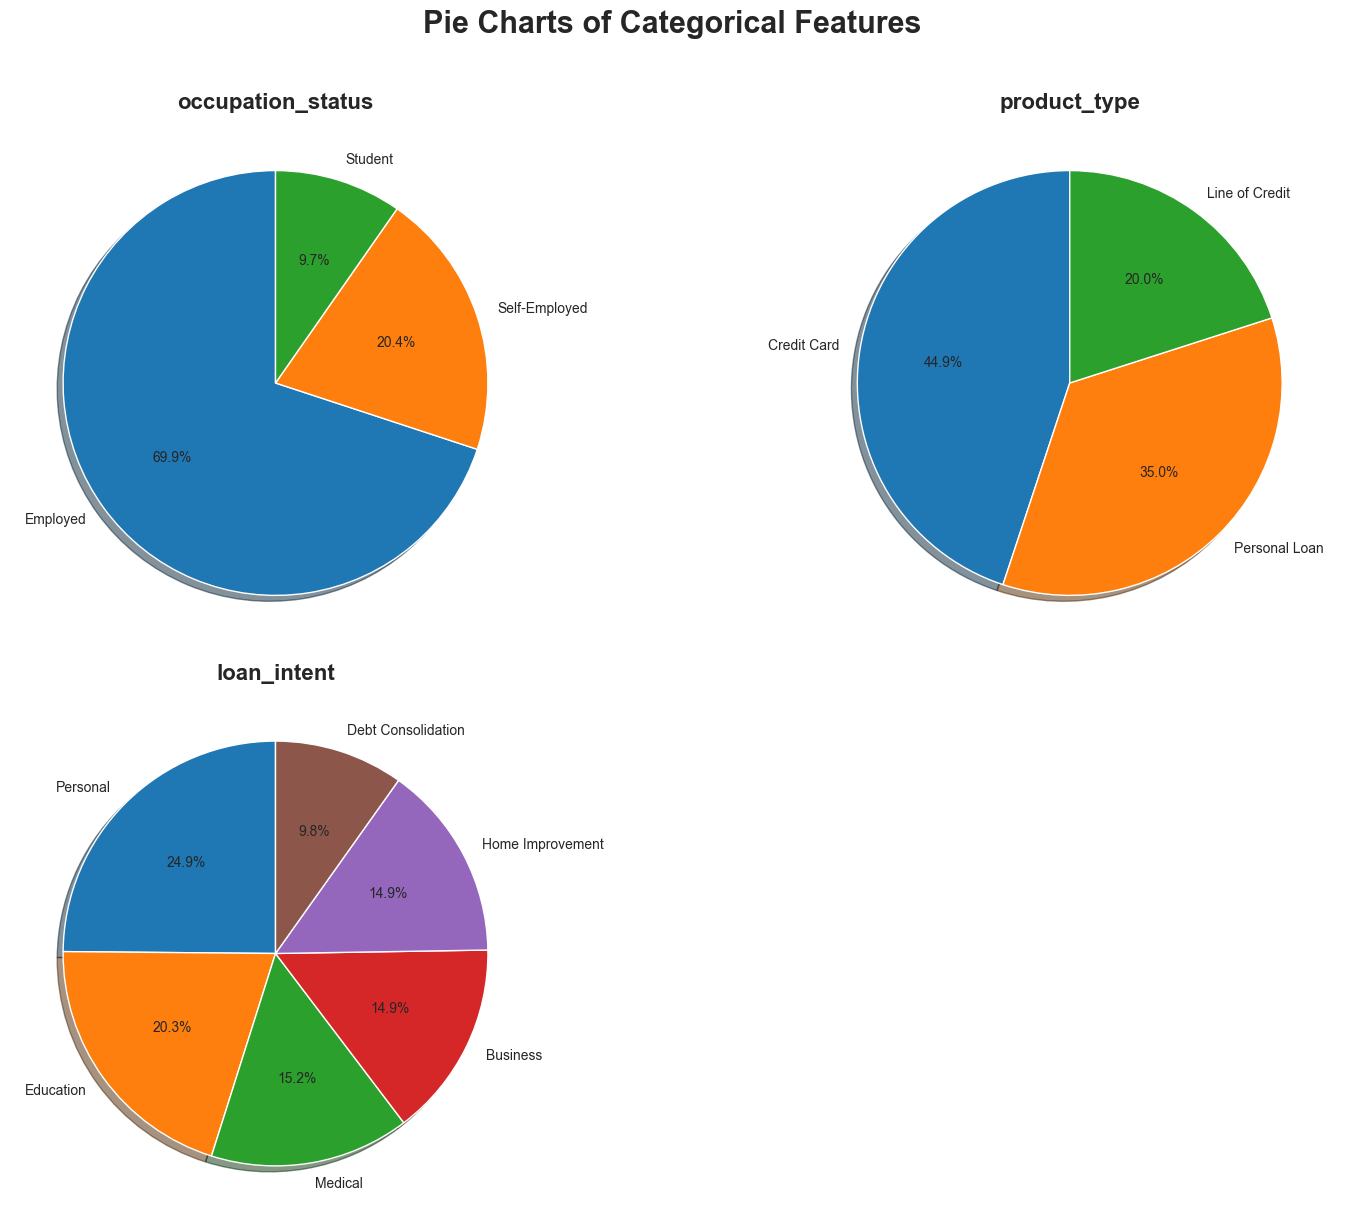

Pie charts saved at: ./plots/categorical_pies.png


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_pie_charts(df, categorical_features, save_path="./plots/categorical_pies.png"):
    """
    Generates pie charts for all categorical variables with enhanced aesthetics.
    """
    # Create plots folder if not exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    
    n_features = len(categorical_features)
    rows = (n_features + 1) // 2

    plt.figure(figsize=(16, rows * 6))
    plt.suptitle("Pie Charts of Categorical Features", fontsize=22, fontweight="bold", y=1.02)

    for i, col in enumerate(categorical_features, 1):
        plt.subplot(rows, 2, i)

        counts = df[col].value_counts()
        labels = counts.index
        sizes = counts.values

        # Pie Chart
        plt.pie(
            sizes,
            labels=labels,
            autopct="%1.1f%%",
            startangle=90,
            shadow=True,
            wedgeprops={"edgecolor": "white", "linewidth": 1}
        )
        plt.title(col, fontsize=16, fontweight="bold")

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

    print(f"Pie charts saved at: {save_path}")

plot_pie_charts(df, categorical_features)

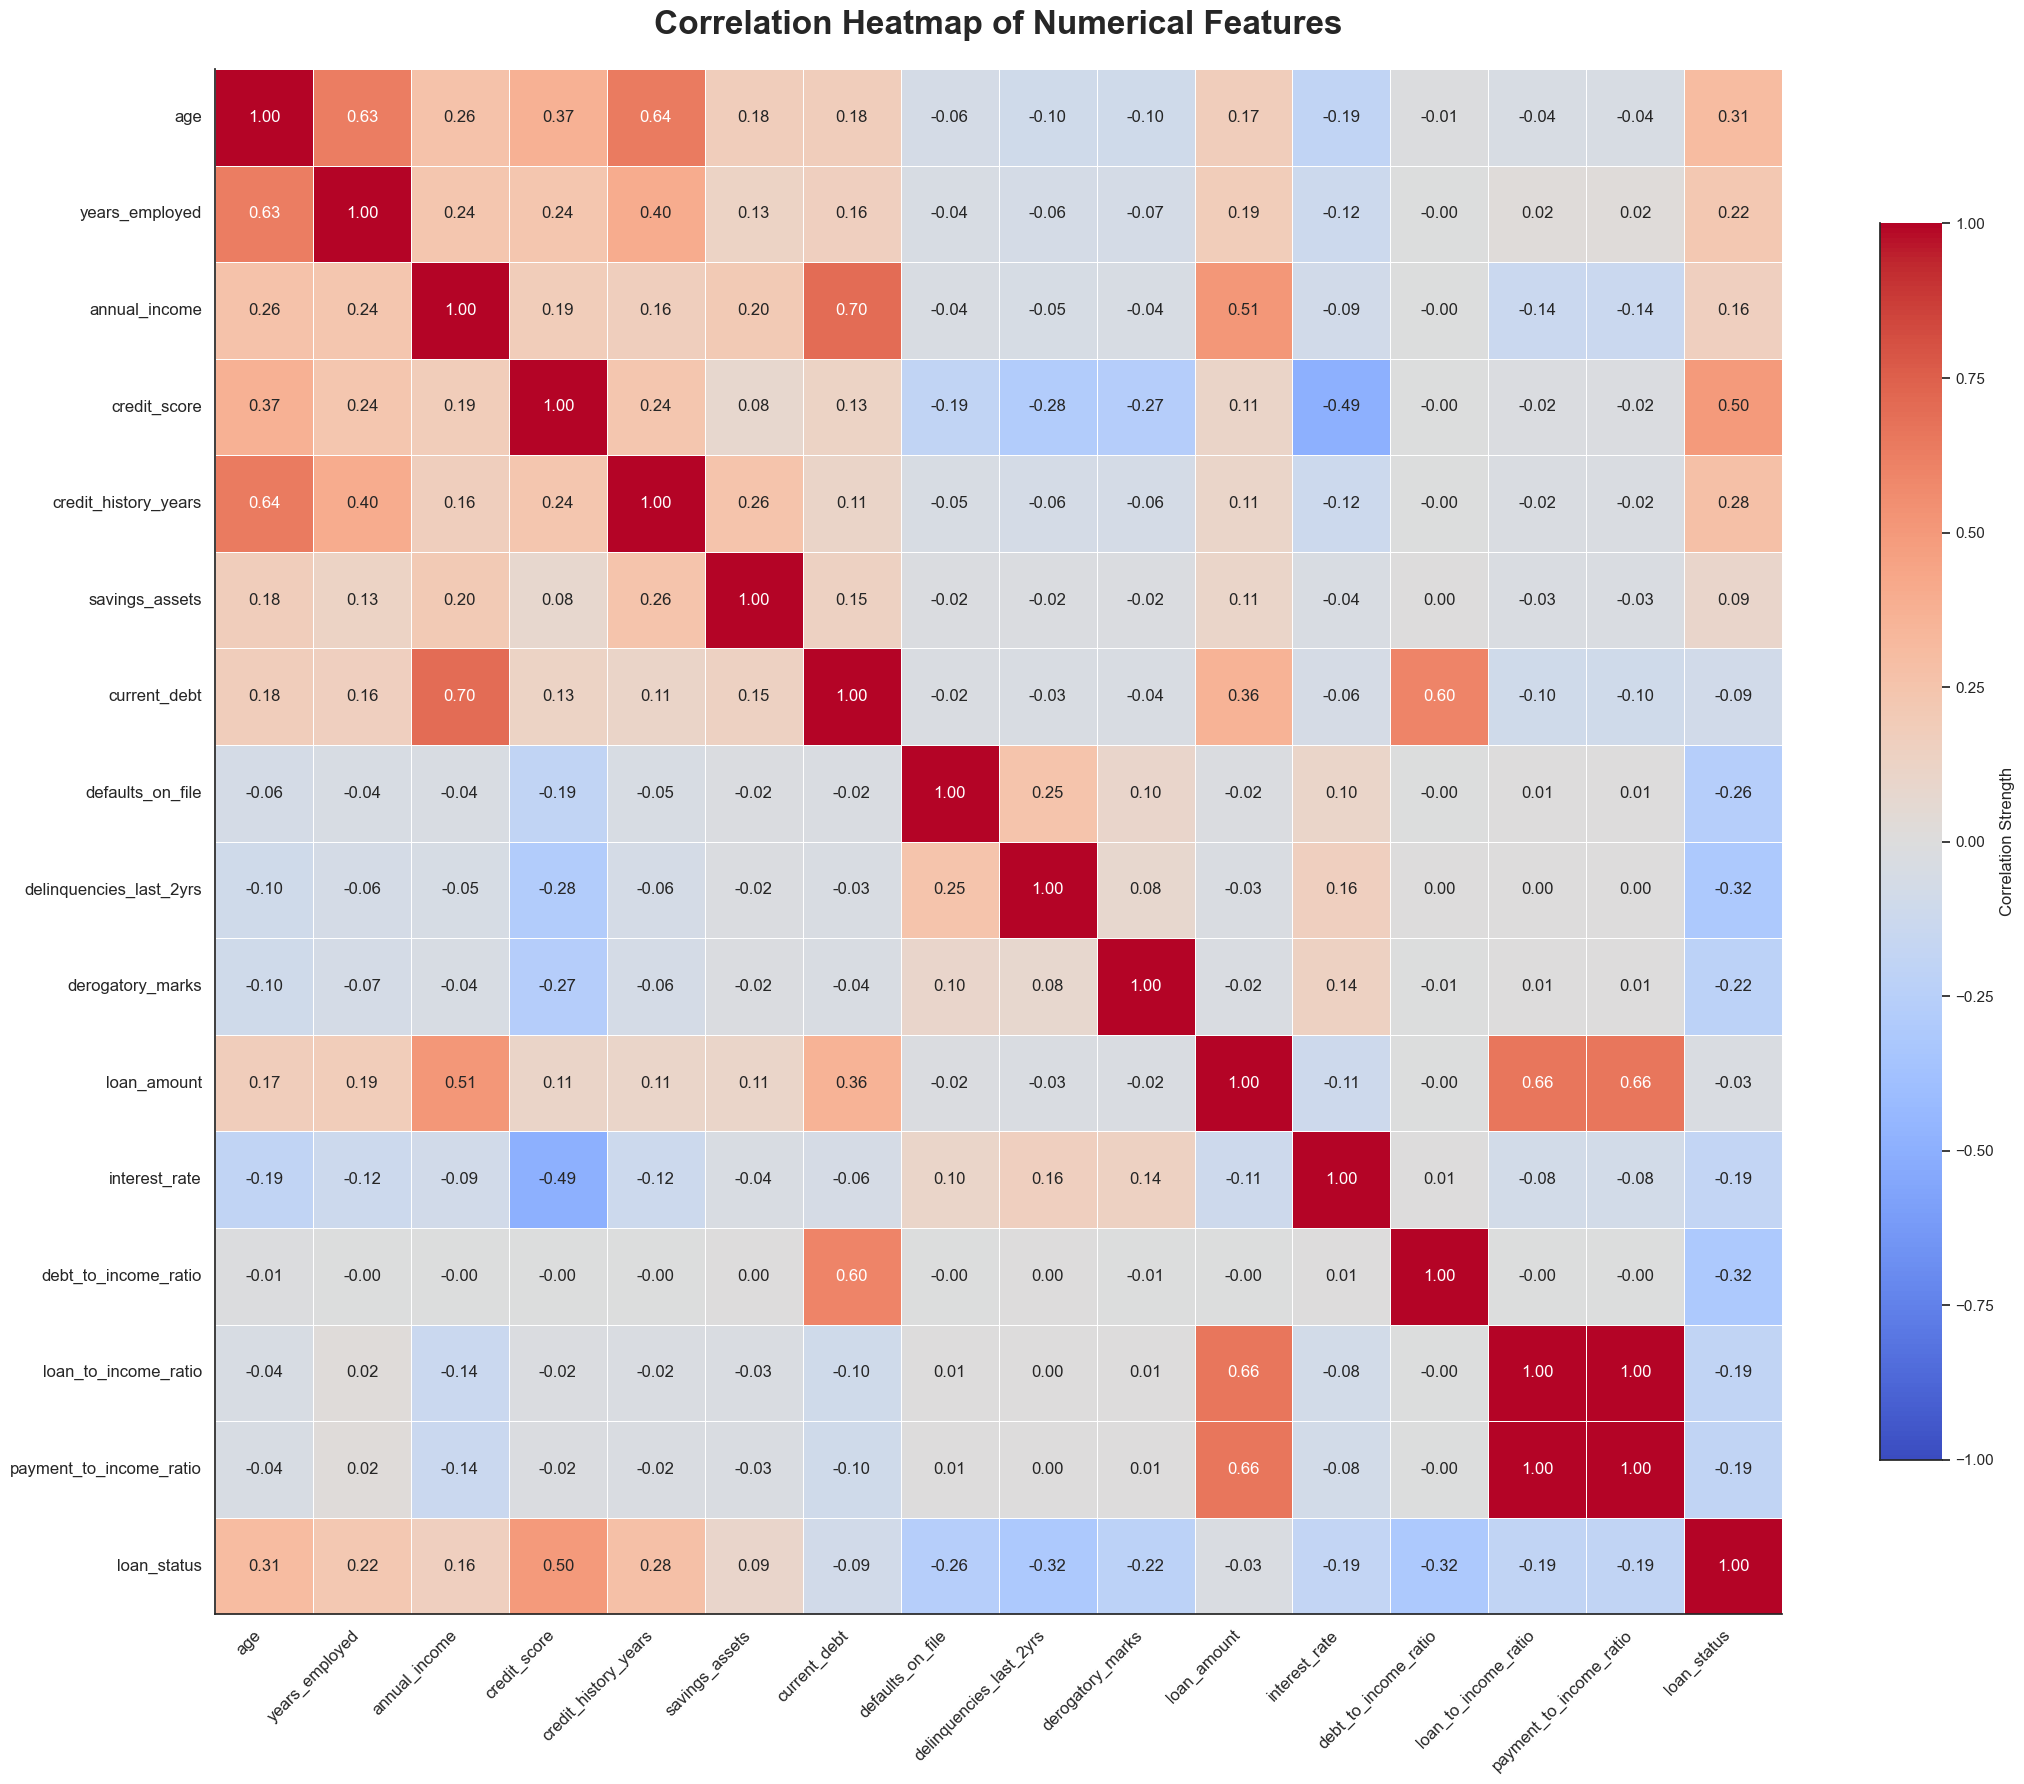

📊 Correlation heatmap saved to: ./plots/corr_heatmap.png


In [20]:
def plot_corr_heatmap(df, numeric_features, save_path="./plots/corr_heatmap.png"):

    # Compute correlation
    corr = df[numeric_features].corr()

    # Generate mask for upper triangle
    #mask = np.triu(np.ones_like(corr, dtype=bool))

    # Style
    sns.set_theme(style="white")

    plt.figure(figsize=(22, 18))
    plt.title("Correlation Heatmap of Numerical Features", fontsize=24, fontweight='bold', pad=25)

    # Heatmap
    ax = sns.heatmap(
        corr,
                         # avoid duplicate triangles
        cmap="coolwarm",           # balanced color map
        annot=True,
        fmt=".2f",                 # rounded numbers
        vmin=-1, vmax=1,           # consistent scale
        center=0,                  # zero-centered colors
        linewidths=0.5,
        cbar_kws={"shrink": 0.8, "label": "Correlation Strength"}
    )

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    sns.despine()

    plt.tight_layout()

    # Create directory if missing
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Save high-resolution image
    plt.savefig(save_path, dpi=350, bbox_inches="tight")
    plt.show()

    print(f"📊 Correlation heatmap saved to: {save_path}")

plot_corr_heatmap(df, numeric_features)


In [21]:
def correlation_insights(df, numeric_features, target_col="loan_status", top_k=5):
    """
    Automatically generates structured insights from the correlation matrix.
    """

    corr = df[numeric_features].corr()

    print("\n=============================== 📊 CORRELATION INSIGHTS =================================\n")

    # ---------- 1️⃣ Strongest Positive Correlations ----------
    print("1️⃣ STRONGEST POSITIVE CORRELATIONS\n")
    pos_corr = (
        corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
            .stack()
            .sort_values(ascending=False)
            .head(top_k)
    )

    for (a, b), val in pos_corr.items():
        print(f"🔹 {a} ↗ {b} → Corr: {val:.2f}")
    print("\n")

    # ---------- 2️⃣ Strongest Negative Correlations ----------
    print("2️⃣ STRONGEST NEGATIVE CORRELATIONS\n")
    neg_corr = (
        corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
            .stack()
            .sort_values()
            .head(top_k)
    )

    for (a, b), val in neg_corr.items():
        print(f"🔻 {a} ↘ {b} → Corr: {val:.2f}")
    print("\n")

    # ---------- 3️⃣ Features Most Relevant to Target ----------
    if target_col in numeric_features:
        print("3️⃣ FEATURES STRONGLY RELATED TO TARGET\n")

        target_corr = corr[target_col].drop(target_col).sort_values(ascending=False)

        print("Top Positive Predictors:\n")
        print(target_corr.head(5).to_string())
        print("\nTop Negative Predictors:\n")
        print(target_corr.tail(5).to_string())
        print("\n")

    # ---------- 4️⃣ Multicollinearity Detection ----------
    print("4️⃣ MULTICOLLINEARITY RISKS\n")
    threshold = 0.75

    high_corr_pairs = (
        corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
            .stack()
            .abs()
            .sort_values(ascending=False)
    )

    flagged_pairs = high_corr_pairs[high_corr_pairs > threshold]

    if flagged_pairs.empty:
        print("✔ No major multicollinearity issues detected.\n")
    else:
        print("⚠ High-correlation feature pairs (>0.75):\n")
        for (a, b), val in flagged_pairs.items():
            print(f"⚠ {a} ↔ {b} → Corr: {val:.2f}")
        print("\nRecommendation: Consider VIF analysis or drop/reduce one of these.\n")

correlation_insights(df, numeric_features)


=============================== 📊 CORRELATION INSIGHTS =================================

1️⃣ STRONGEST POSITIVE CORRELATIONS

🔹 loan_to_income_ratio ↗ payment_to_income_ratio → Corr: 1.00
🔹 annual_income ↗ current_debt → Corr: 0.70
🔹 loan_amount ↗ payment_to_income_ratio → Corr: 0.66
🔹 loan_amount ↗ loan_to_income_ratio → Corr: 0.66
🔹 age ↗ credit_history_years → Corr: 0.64


2️⃣ STRONGEST NEGATIVE CORRELATIONS

🔻 credit_score ↘ interest_rate → Corr: -0.49
🔻 delinquencies_last_2yrs ↘ loan_status → Corr: -0.32
🔻 debt_to_income_ratio ↘ loan_status → Corr: -0.32
🔻 credit_score ↘ delinquencies_last_2yrs → Corr: -0.28
🔻 credit_score ↘ derogatory_marks → Corr: -0.27


3️⃣ FEATURES STRONGLY RELATED TO TARGET

Top Positive Predictors:

credit_score            0.496316
age                     0.311524
credit_history_years    0.277103
years_employed          0.218875
annual_income           0.158466

Top Negative Predictors:

payment_to_income_ratio   -0.193258
derogatory_marks          -0.224

In [22]:
df.columns

Index(['customer_id', 'age', 'occupation_status', 'years_employed',
       'annual_income', 'credit_score', 'credit_history_years',
       'savings_assets', 'current_debt', 'defaults_on_file',
       'delinquencies_last_2yrs', 'derogatory_marks', 'product_type',
       'loan_intent', 'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio', 'loan_status'],
      dtype='object')

In [23]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Names of continues features:',continuous_features)

Names of continues features: ['age', 'years_employed', 'annual_income', 'credit_score', 'credit_history_years', 'savings_assets', 'current_debt', 'delinquencies_last_2yrs', 'loan_amount', 'interest_rate', 'debt_to_income_ratio', 'loan_to_income_ratio', 'payment_to_income_ratio']


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif
#Just to check what will happen if we romove a feature
cont_features = continuous_features.copy()
cont_features.remove('loan_to_income_ratio')
compute_vif(cont_features, df)

Variable       VIF
0                       age  2.508155
1            years_employed  1.669854
2             annual_income  6.241590
3              credit_score  1.569388
4      credit_history_years  1.745786
5            savings_assets  1.103103
6              current_debt  6.651593
7   delinquencies_last_2yrs  1.088738
8               loan_amount  5.282914
9             interest_rate  1.337799
10     debt_to_income_ratio  3.408988
11  payment_to_income_ratio  3.994036

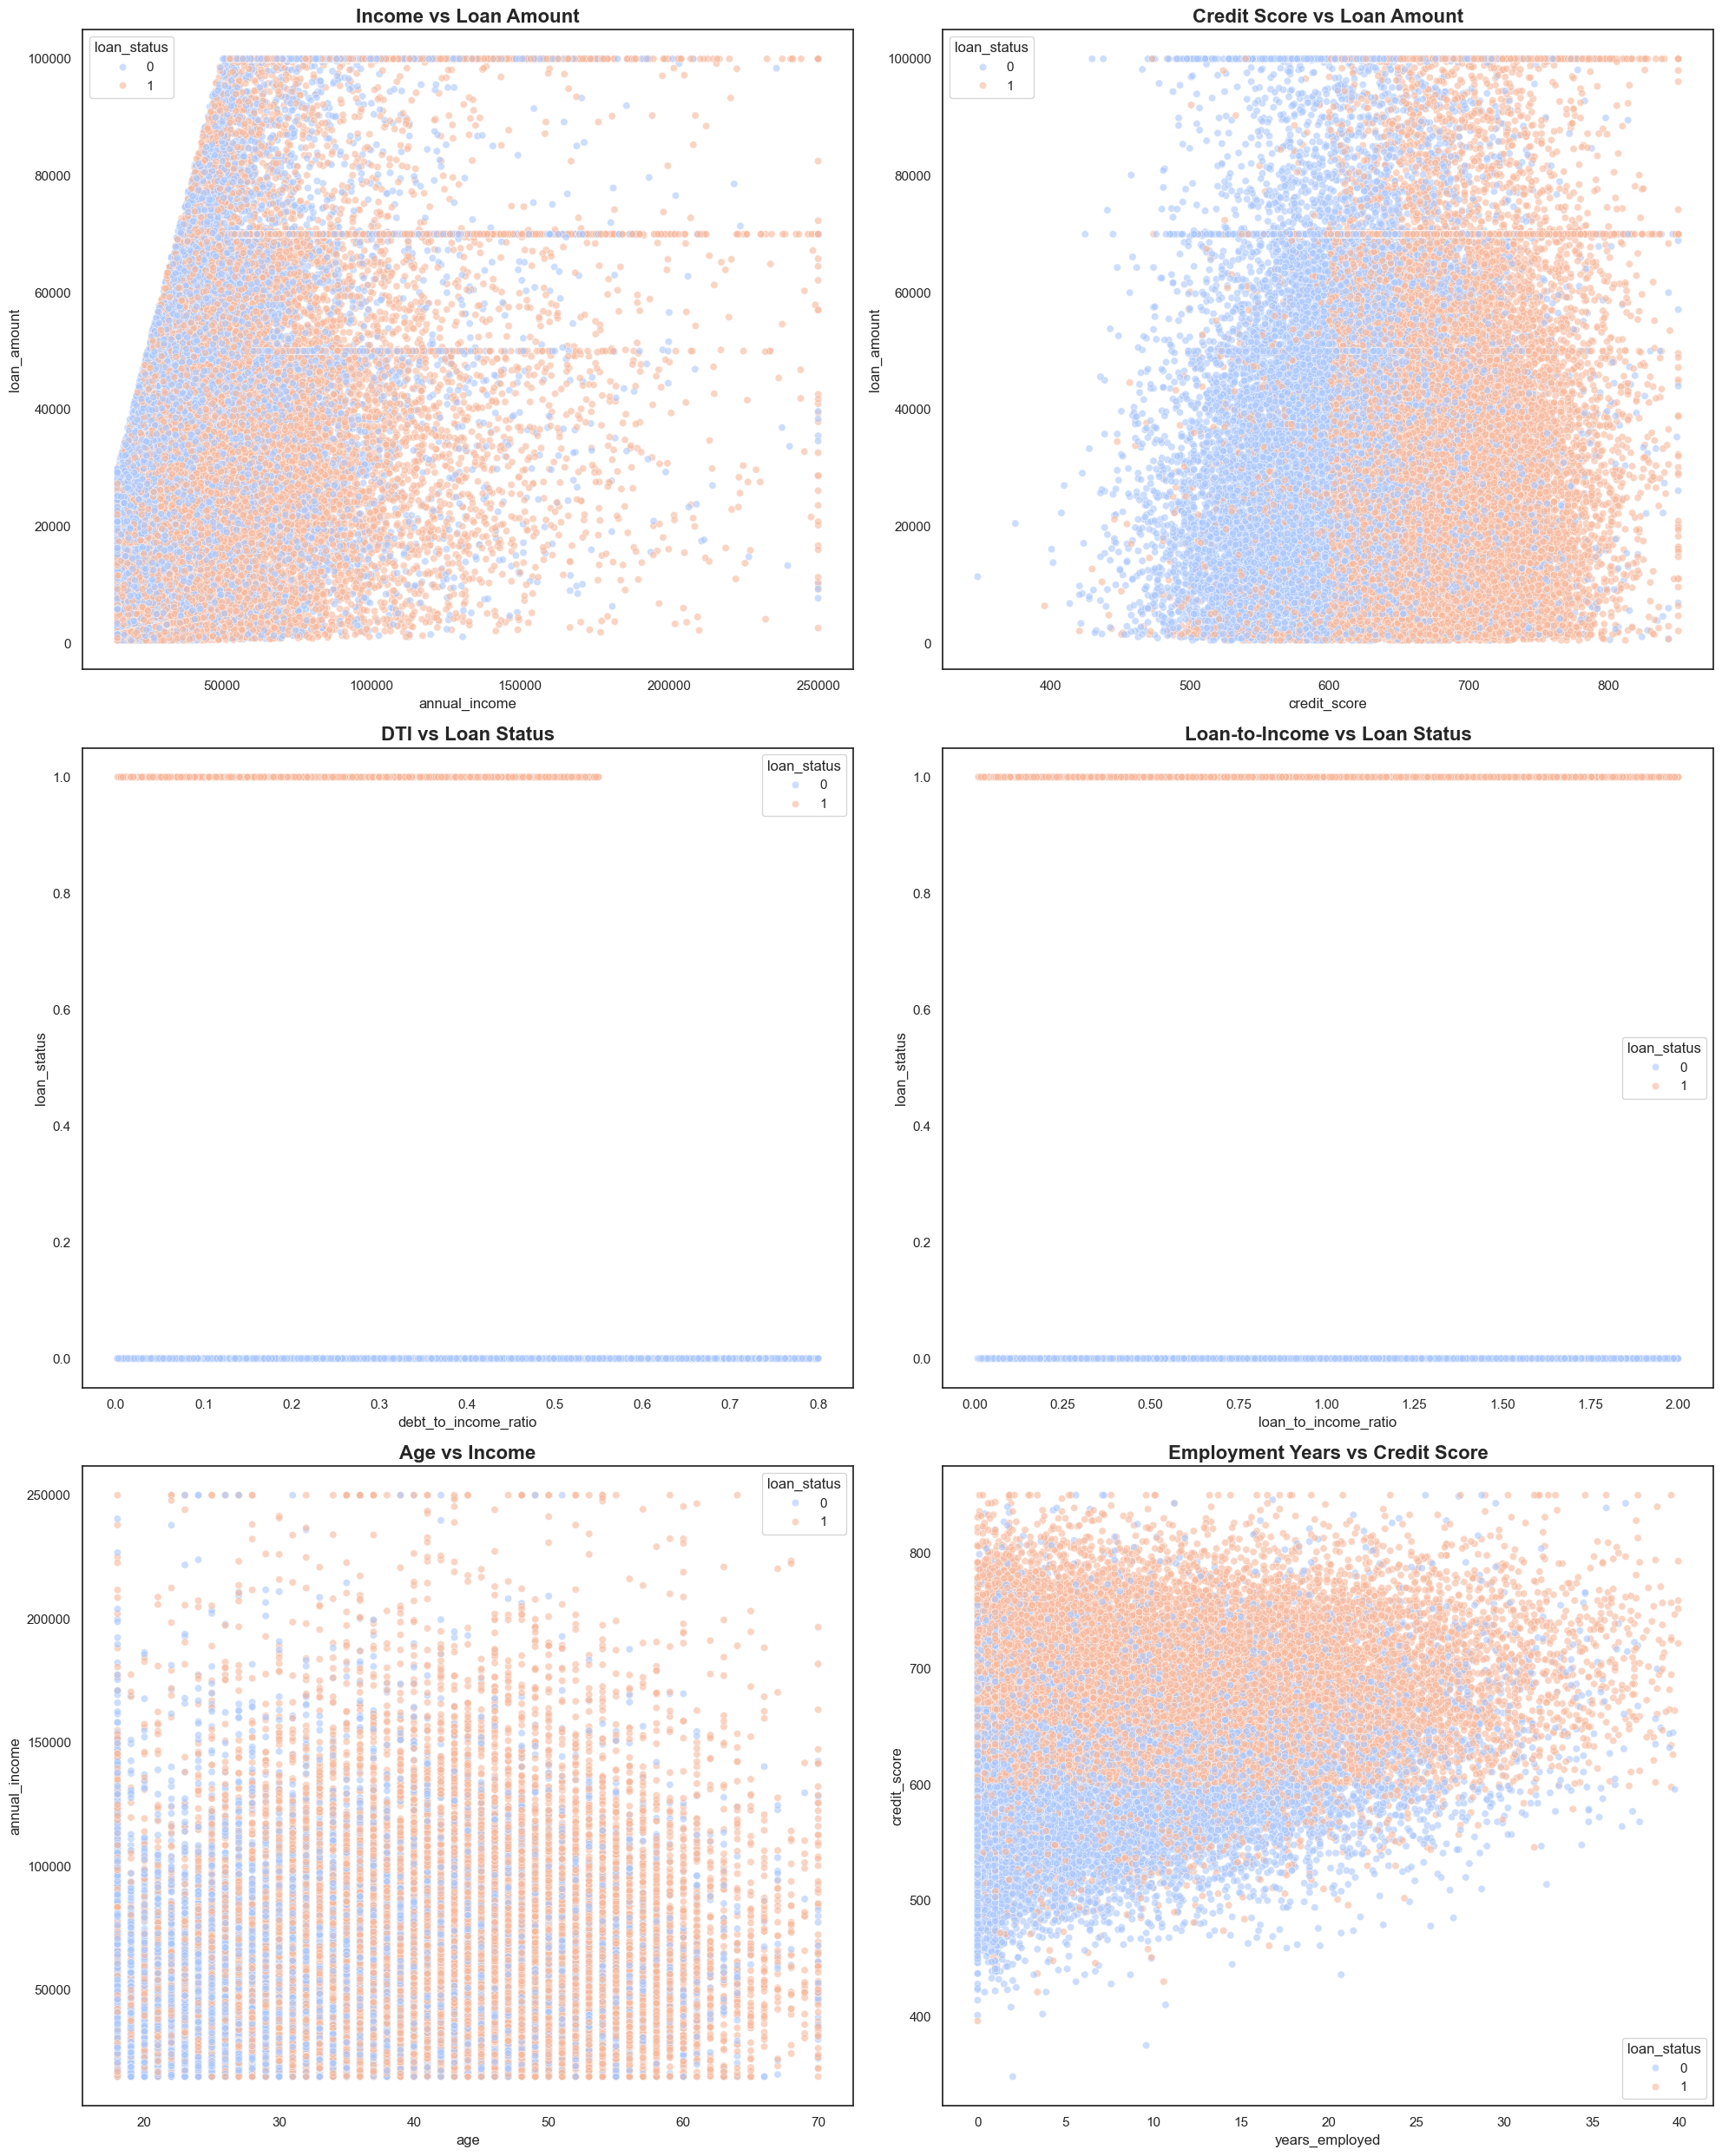

Scatter insight plots saved at: ./plots/scatter_insights.png


In [25]:
def plot_important_scatter_plots(df, save_path="./plots/scatter_insights.png"):
    """
    Generates important scatter plots for insights in a loan approval dataset.
    """

    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    scatter_pairs = [
        ("annual_income", "loan_amount", "Income vs Loan Amount"),
        ("credit_score", "loan_amount", "Credit Score vs Loan Amount"),
        ("debt_to_income_ratio", "loan_status", "DTI vs Loan Status"),
        ("loan_to_income_ratio", "loan_status", "Loan-to-Income vs Loan Status"),
        ("age", "annual_income", "Age vs Income"),
        ("years_employed", "credit_score", "Employment Years vs Credit Score")
    ]

    plt.figure(figsize=(20, 25))
    #plt.title("Important Scatter Plots for Insights", fontsize=22, fontweight='bold', y=0.92)

    for i, (x, y, title) in enumerate(scatter_pairs, 1):
        plt.subplot(3, 2, i)
        sns.scatterplot(
            x=df[x],
            y=df[y],
            hue=df["loan_status"],
            palette="coolwarm",
            alpha=0.6
        )
        plt.title(title, fontsize=16, fontweight='bold')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.tight_layout()

    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

    print(f"Scatter insight plots saved at: {save_path}")
plot_important_scatter_plots(df)